In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [3]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [4]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
fake[fake.duplicated(keep = False)]

,title,text,subject,date
9941,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11445,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14924,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [8]:
true[true.duplicated(keep=False)]

,title,text,subject,date
416,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
762,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
850,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
...,...,...,...,...
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21345,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"


In [9]:
fake = fake.drop_duplicates()

In [10]:
true = true.drop_duplicates()

In [11]:
true.shape

(21211, 4)

In [12]:
fake.shape

(23478, 4)

In [13]:
fake['Target'] = 'fake'

In [14]:
fake.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [15]:
true['Target'] = 'true'

In [16]:
true

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [17]:
fake['label'] = 0
true['label'] = 1

In [20]:
fake

,title,text,subject,date,Target,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,0
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake,0


In [18]:
true

,title,text,subject,date,Target,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true,1
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true,1


In [19]:
data = pd.concat([fake, true], axis = 0)

In [20]:
data = data.reset_index(drop=True)

In [24]:
data

,title,text,subject,date,Target,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,0
...,...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true,1
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true,1
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true,1
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true,1


In [21]:
data = data.drop('date', axis = 1)

In [22]:
data

,title,text,subject,Target,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,fake,0
...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,true,1
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,true,1
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,true,1
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,true,1


# Data Cleaning

In [27]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop = True)

In [28]:
data

,title,text,subject,Target,label
0,"WHY DID 14 Massive Teen Mall Brawls, Including...",MASSIVE PLANNED MALL FIGHTS Broke out across t...,left-news,fake,0
1,Asian-American judges among Obama's options as...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true,1
2,Kerry says no pressing need for more U.S.-Cana...,OTTAWA (Reuters) - The United States sees no u...,politicsNews,true,1
3,Judge gives research firm in Trump-Russia prob...,WASHINGTON (Reuters) - A U.S. judge has given ...,politicsNews,true,1
4,Protesters sentenced to jail in French 'Kung F...,PARIS (Reuters) - Youths who torched a police ...,worldnews,true,1
...,...,...,...,...,...
44684,Wreck of WWI German 'U-boat' submarine found o...,BRUSSELS (Reuters) - The well-preserved wreck ...,worldnews,true,1
44685,MEET CONSERVATIVE MUSLIM Steve Bannon Hired Fo...,In the course of hosting Thursday s Breitbart ...,left-news,fake,0
44686,BOOM! Dodgers Baseball Radio Legend Drops A Mi...,This is totally out of left field! Vin Scully ...,politics,fake,0
44687,New Study Offers Hope In Search For Alzheimer...,Alzheimer s Disease is a devastating type of d...,News,fake,0


In [29]:
no_text = data[data['text'].isnull() | data['text'].eq(' ') | data['text'].eq('  ')]

In [30]:
data = data.drop(no_text.index)

In [31]:
data

,title,text,subject,Target,label
0,"WHY DID 14 Massive Teen Mall Brawls, Including...",MASSIVE PLANNED MALL FIGHTS Broke out across t...,left-news,fake,0
1,Asian-American judges among Obama's options as...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true,1
2,Kerry says no pressing need for more U.S.-Cana...,OTTAWA (Reuters) - The United States sees no u...,politicsNews,true,1
3,Judge gives research firm in Trump-Russia prob...,WASHINGTON (Reuters) - A U.S. judge has given ...,politicsNews,true,1
4,Protesters sentenced to jail in French 'Kung F...,PARIS (Reuters) - Youths who torched a police ...,worldnews,true,1
...,...,...,...,...,...
44684,Wreck of WWI German 'U-boat' submarine found o...,BRUSSELS (Reuters) - The well-preserved wreck ...,worldnews,true,1
44685,MEET CONSERVATIVE MUSLIM Steve Bannon Hired Fo...,In the course of hosting Thursday s Breitbart ...,left-news,fake,0
44686,BOOM! Dodgers Baseball Radio Legend Drops A Mi...,This is totally out of left field! Vin Scully ...,politics,fake,0
44687,New Study Offers Hope In Search For Alzheimer...,Alzheimer s Disease is a devastating type of d...,News,fake,0


In [32]:
# lowercase the text
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,title,text,subject,Target,label
0,"WHY DID 14 Massive Teen Mall Brawls, Including...",massive planned mall fights broke out across t...,left-news,fake,0
1,Asian-American judges among Obama's options as...,washington (reuters) - president barack obama ...,politicsNews,true,1
2,Kerry says no pressing need for more U.S.-Cana...,ottawa (reuters) - the united states sees no u...,politicsNews,true,1
3,Judge gives research firm in Trump-Russia prob...,washington (reuters) - a u.s. judge has given ...,politicsNews,true,1
4,Protesters sentenced to jail in French 'Kung F...,paris (reuters) - youths who torched a police ...,worldnews,true,1


In [33]:
def remove_punc(text):
    all_word = [word for word in text if word not in string.punctuation]
    clear_str = ''.join(all_word)
    return clear_str

In [34]:
data['text'] = data['text'].apply(remove_punc)

In [35]:
data['text']

0        massive planned mall fights broke out across t...
1        washington reuters  president barack obama has...
2        ottawa reuters  the united states sees no urge...
3        washington reuters  a us judge has given fusio...
4        paris reuters  youths who torched a police car...
                               ...                        
44684    brussels reuters  the wellpreserved wreck of a...
44685    in the course of hosting thursday s breitbart ...
44686    this is totally out of left field vin scully g...
44687    alzheimer s disease is a devastating type of d...
44688    if donald trump had been at madison square gar...
Name: text, Length: 44058, dtype: object

In [36]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [37]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Basic Data Eploration

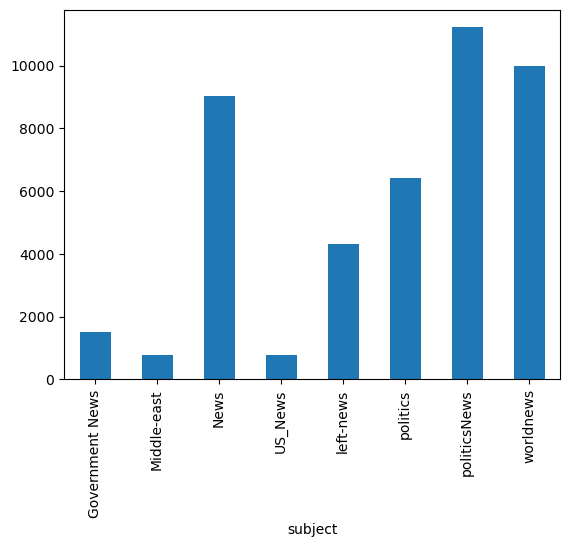

In [36]:
# articles per subject
data.groupby(['subject'])['text'].count().plot(kind = 'bar')
plt.show()

Target
fake    22848
true    21210
Name: count, dtype: int64


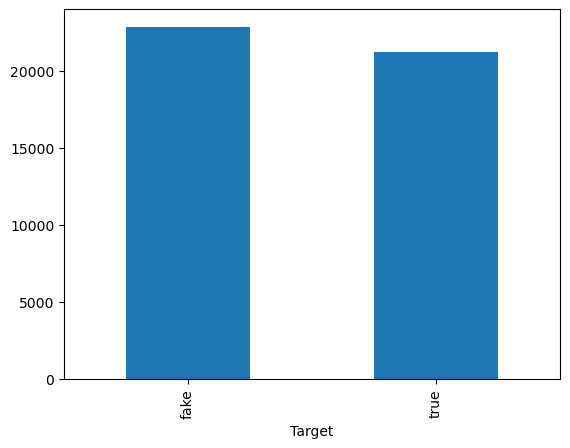

In [37]:
# Number of fake and real articles
print(data['Target'].value_counts())
data['Target'].value_counts().plot(kind = 'bar')
plt.show()

In [38]:
fake_data = data[data['Target'] == 'fake']
fake_data

,title,text,subject,Target,label
0,OBAMA HAS BLOOD ON HIS HANDS: Otto Warmbier Ha...,sad report otto warmbier died university cinci...,politics,fake,0
1,HEY RACHEL MADDOW…While You’re On The Subject ...,rachel subject taxes president trump paid remi...,politics,fake,0
5,This Is How Trump Could Win In A Landslide – ...,ah ultimate trump fangirl exception sarah pali...,News,fake,0
7,"STUNNING BETRAYAL! 43 REPUBLICANS, In Dark Of ...",knew president could much damage one year knew...,left-news,fake,0
10,Sarah Palin Faced Sexual Harassment At Fox Ne...,highprofile women like sarah palin stay silent...,News,fake,0
...,...,...,...,...,...
44680,Why Mike Bloomberg Running For President Will...,third independent option president surely demo...,News,fake,0
44682,BREAKING REPORT: Two Al Qaeda Terrorists Able ...,refugee resettlement program needs bed stopped...,Government News,fake,0
44683,Eric Trump Just Said Something Monumentally S...,secret team trump tizzy jill stein recount att...,News,fake,0
44687,Kellyanne Conway SHUTS DOWN ABC News Hack Geor...,talking hollywood reporter wentworth said trum...,left-news,fake,0


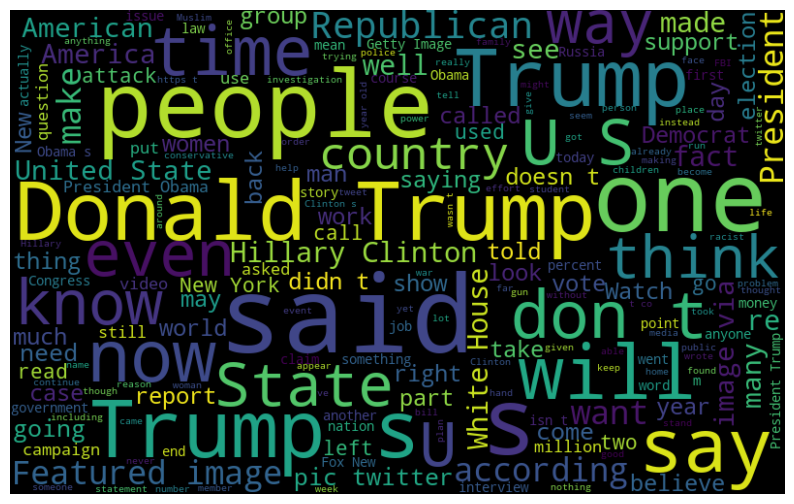

In [40]:
# word cloud for fake data
all_words = ' '.join([word for word in fake.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

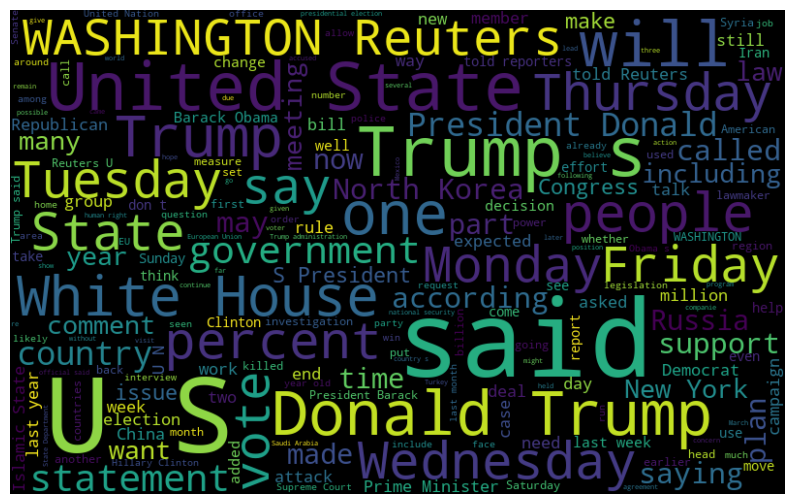

In [41]:
# word cloud for true data
all_words = ' '.join([word for word in true.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()

def counter(text,quantity):
    all_word = ' '.join([word for word in text])
    tokens = token_space.tokenize(all_word)
    frequency = nltk.FreqDist(tokens)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

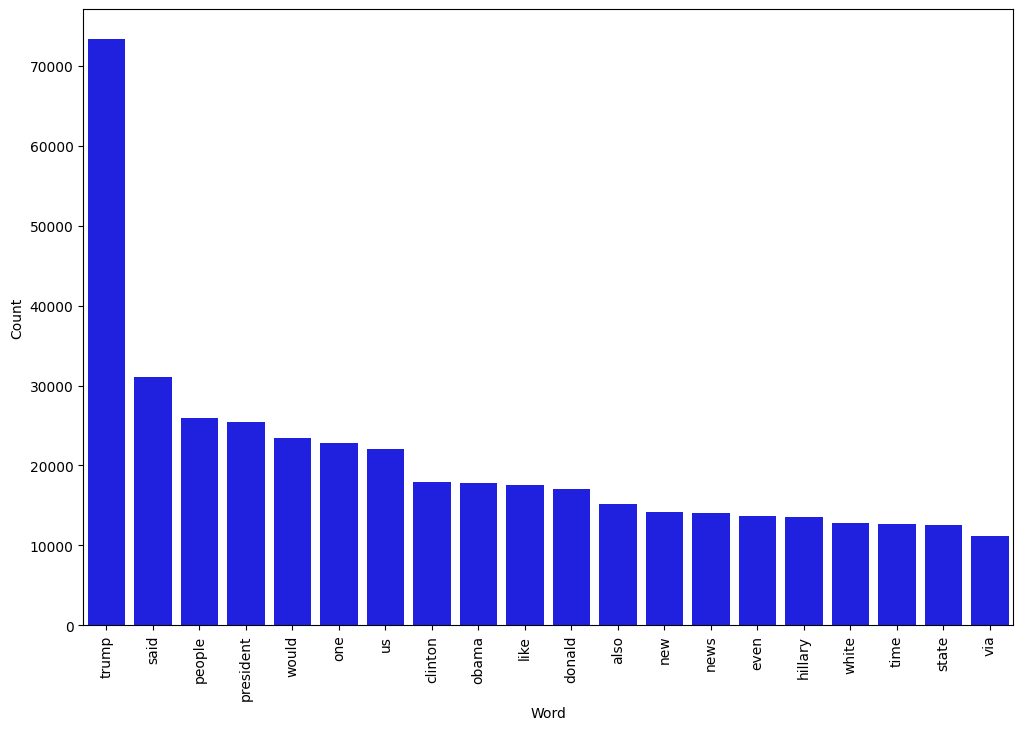

In [41]:
# Top 20 word in fake data
counter(data[data['Target'] == 'fake'].text, 20)

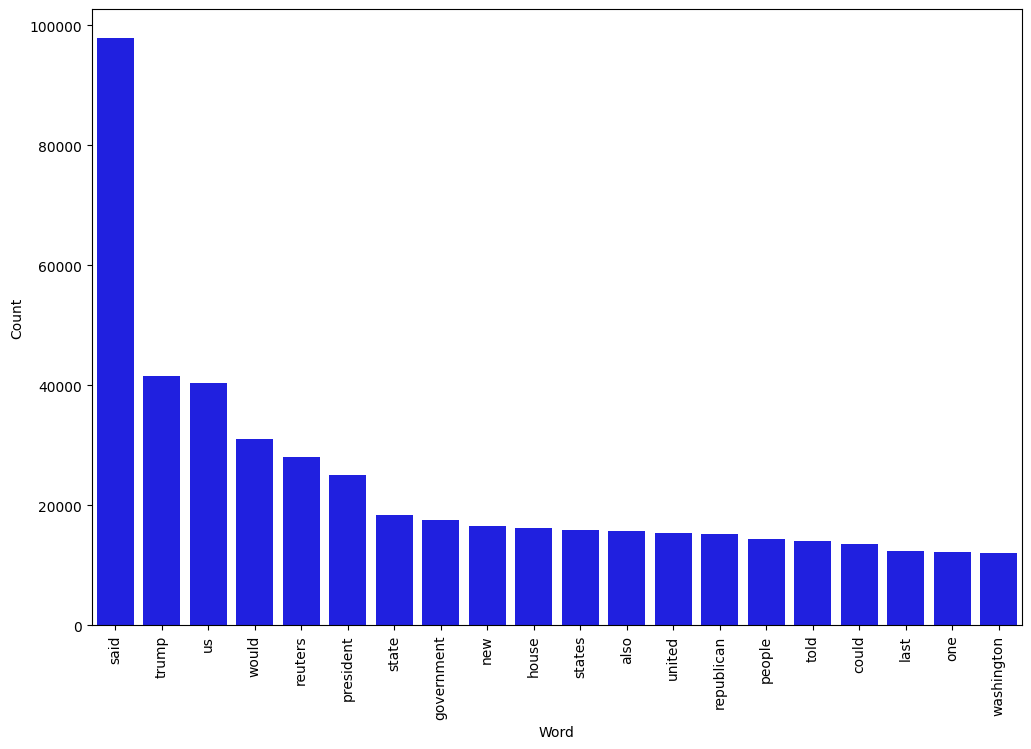

In [42]:
# Top 20 word in true data
counter(data[data['Target'] == 'true'].text, 20)

In [43]:
# plotting the confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(data['text'],data.Target, test_size=0.2, random_state= 42)

# Naive Bayes

In [45]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.01%


Confusion matrix, without normalization


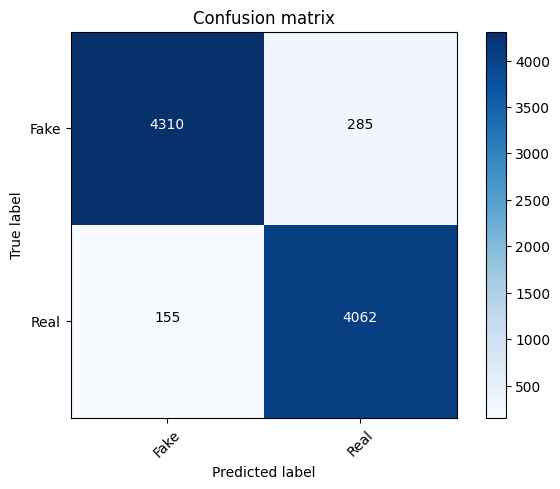

In [46]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic Regression

In [47]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.84%


Confusion matrix, without normalization


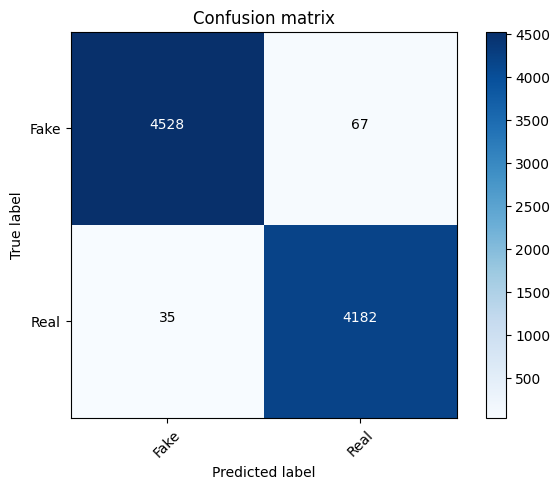

In [48]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.65%


Confusion matrix, without normalization


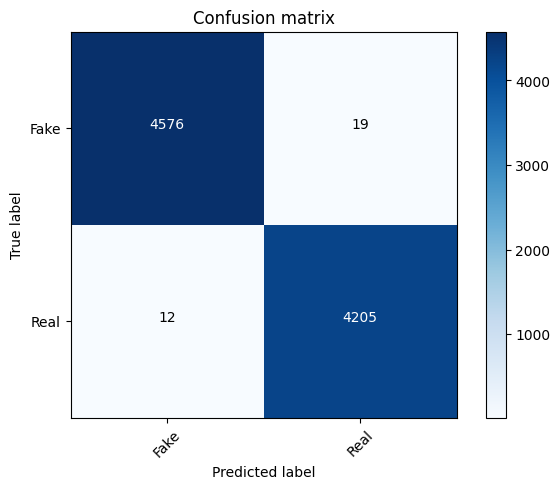

In [50]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.32%


Confusion matrix, without normalization


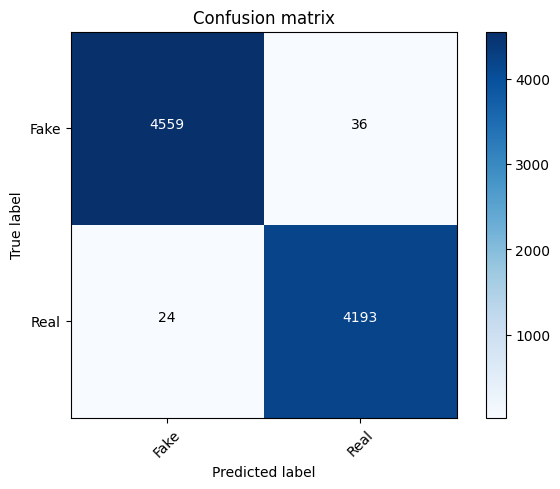

In [52]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

([<matplotlib.axis.YTick at 0x19c865da800>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

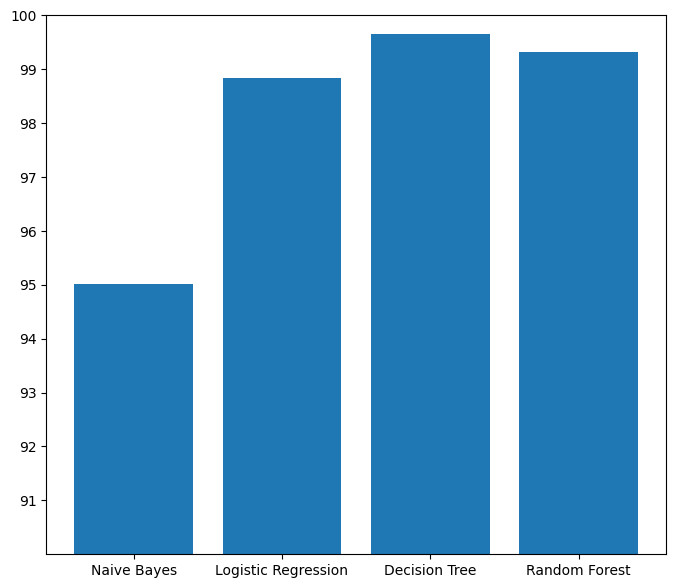

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Convert text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # limit vocab size
X = tfidf.fit_transform(data['text']).toarray()
y = data['label'].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ANN model
model = Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"ANN Test Accuracy: {acc:.4f}")


Epoch 1/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9606 - loss: 0.2494 - val_accuracy: 0.9871 - val_loss: 0.1496
Epoch 2/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9856 - loss: 0.1407 - val_accuracy: 0.9890 - val_loss: 0.1283
Epoch 3/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9872 - loss: 0.1273 - val_accuracy: 0.9860 - val_loss: 0.1273
Epoch 4/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9875 - loss: 0.1217 - val_accuracy: 0.9855 - val_loss: 0.1254
Epoch 5/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9883 - loss: 0.1161 - val_accuracy: 0.9885 - val_loss: 0.1169
ANN Test Accuracy: 0.9890


In [24]:
import pickle

# Save TF-IDF vectorizer
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))

# Save ANN model
model.save("ann_model.h5")
